In [37]:
import pandas as pd
csi300 = pd.read_csv('CSI 300 Historical Data.csv')
csi300.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3886 non-null   object
 1   Close     3886 non-null   object
 2   Open      3886 non-null   object
 3   High      3886 non-null   object
 4   Low       3886 non-null   object
 5   Vol.      3886 non-null   object
 6   Change %  3886 non-null   object
dtypes: object(7)
memory usage: 212.6+ KB


In [38]:
# Change the column name
csi300.rename(columns={'Change %':'Change Pct'},inplace=True)
csi300.rename(columns={'Vol.':'Volume'},inplace=True)

In [39]:
# Convert data into appropriate data type
def remove_percent_sign(col_name):
    for i in range(len(csi300[col_name])):
        num = csi300.at[i,col_name]
        if not isinstance(num,float):
            csi300.at[i,col_name] = num.replace("%","").strip()

remove_percent_sign('Change Pct')
csi300

,Date,Close,Open,High,Low,Volume,Change Pct
0,23-Dec-20,"5,013.80","4,977.30","5,025.12","4,977.09",82.67K,0.99
1,22-Dec-20,"4,964.77","5,034.98","5,055.13","4,960.95",162.35K,-1.63
2,21-Dec-20,"5,046.84","4,995.76","5,048.51","4,970.00",140.81K,0.94
3,18-Dec-20,"4,999.97","5,014.32","5,027.44","4,979.00",128.05K,-0.35
4,17-Dec-20,"5,017.48","4,960.73","5,021.62","4,950.37",133.39K,1.28
...,...,...,...,...,...,...,...
3881,10-Jan-05,993.88,983.76,993.96,979.79,5.79K,1.01
3882,7-Jan-05,983.96,983.05,995.71,979.81,7.30K,0.08
3883,6-Jan-05,983.17,993.33,993.79,980.33,6.29K,-0.95
3884,5-Jan-05,992.56,981.58,997.32,979.88,7.12K,0.99


In [40]:
# volume
def remove_character(col_name):
    for i in range(len(csi300[col_name])):
        num = csi300.at[i,col_name]
        if 'K' in num:
            csi300.at[i,col_name] = num.strip("K")
        if ',' in num:
            csi300.at[i,col_name] = num.replace(",","").strip()

remove_character('Close')
remove_character('Open')
remove_character('High')
remove_character('Low')
remove_character('Volume')
csi300

,Date,Close,Open,High,Low,Volume,Change Pct
0,23-Dec-20,5013.80,4977.30,5025.12,4977.09,82.67,0.99
1,22-Dec-20,4964.77,5034.98,5055.13,4960.95,162.35,-1.63
2,21-Dec-20,5046.84,4995.76,5048.51,4970.00,140.81,0.94
3,18-Dec-20,4999.97,5014.32,5027.44,4979.00,128.05,-0.35
4,17-Dec-20,5017.48,4960.73,5021.62,4950.37,133.39,1.28
...,...,...,...,...,...,...,...
3881,10-Jan-05,993.88,983.76,993.96,979.79,5.79,1.01
3882,7-Jan-05,983.96,983.05,995.71,979.81,7.30,0.08
3883,6-Jan-05,983.17,993.33,993.79,980.33,6.29,-0.95
3884,5-Jan-05,992.56,981.58,997.32,979.88,7.12,0.99


In [41]:
csi300['Date'] = pd.to_datetime(csi300['Date'])

csi300['Volume'] = csi300['Volume'].astype('float')*1000
csi300['Volume'] = csi300['Volume'].astype('int')
csi300['Close'] = csi300['Close'].astype('float')
csi300['Open'] = csi300['Open'].astype('float')
csi300['High'] = csi300['High'].astype('float')
csi300['Low'] = csi300['Low'].astype('float')
csi300['Change Pct'] = csi300['Change Pct'].astype('float')

'''
Note: Change Pct = (Close price ((N+1)th Trade day) - Close price (Nth Trade day)) / Close price (Nth Trade day)
'''

'\nNote: Change Pct = (Close price ((N+1)th Trade day) - Close price (Nth Trade day)) / Close price (Nth Trade day)\n'

In [42]:
csi300.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3886 non-null   datetime64[ns]
 1   Close       3886 non-null   float64       
 2   Open        3886 non-null   float64       
 3   High        3886 non-null   float64       
 4   Low         3886 non-null   float64       
 5   Volume      3886 non-null   int32         
 6   Change Pct  3886 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 197.5 KB


In [43]:
csi300.describe()

,Close,Open,High,Low,Volume,Change Pct
count,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000
mean,3012.528937,3009.483013,3039.281137,2979.664645,92529.751673,0.056065
std,1042.855680,1042.955857,1052.872281,1030.116296,81389.669580,1.704406
min,818.030000,816.550000,823.860000,807.780000,-21320.000000,-9.240000
25%,2365.997500,2363.002500,2386.322500,2340.755000,44765.000000,-0.710000
50%,3145.640000,3143.995000,3175.100000,3112.745000,74160.000000,0.090000
75%,3724.630000,3718.315000,3754.672500,3679.985000,109465.000000,0.870000
max,5877.200000,5862.380000,5891.720000,5815.610000,686440.000000,9.340000


In [44]:
csi300.loc[csi300['Volume']<0]

,Date,Close,Open,High,Low,Volume,Change Pct
3754,2005-07-22,859.69,847.54,867.16,842.99,-21320,1.86


In [45]:
csi300.at[3754,'Volume'] = 21320.0
csi300.describe()

,Close,Open,High,Low,Volume,Change Pct
count,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000
mean,3012.528937,3009.483013,3039.281137,2979.664645,92540.724395,0.056065
std,1042.855680,1042.955857,1052.872281,1030.116296,81377.190076,1.704406
min,818.030000,816.550000,823.860000,807.780000,5020.000000,-9.240000
25%,2365.997500,2363.002500,2386.322500,2340.755000,44765.000000,-0.710000
50%,3145.640000,3143.995000,3175.100000,3112.745000,74160.000000,0.090000
75%,3724.630000,3718.315000,3754.672500,3679.985000,109465.000000,0.870000
max,5877.200000,5862.380000,5891.720000,5815.610000,686440.000000,9.340000


In [46]:
csi300

,Date,Close,Open,High,Low,Volume,Change Pct
0,2020-12-23,5013.80,4977.30,5025.12,4977.09,82670,0.99
1,2020-12-22,4964.77,5034.98,5055.13,4960.95,162350,-1.63
2,2020-12-21,5046.84,4995.76,5048.51,4970.00,140810,0.94
3,2020-12-18,4999.97,5014.32,5027.44,4979.00,128050,-0.35
4,2020-12-17,5017.48,4960.73,5021.62,4950.37,133390,1.28
...,...,...,...,...,...,...,...
3881,2005-01-10,993.88,983.76,993.96,979.79,5790,1.01
3882,2005-01-07,983.96,983.05,995.71,979.81,7300,0.08
3883,2005-01-06,983.17,993.33,993.79,980.33,6290,-0.95
3884,2005-01-05,992.56,981.58,997.32,979.88,7120,0.99


In [47]:
csi300.sort_values(by='Date',inplace=True)
csi300 = csi300.reset_index(drop=True)

In [48]:
csi300

,Date,Close,Open,High,Low,Volume,Change Pct
0,2005-01-04,982.79,994.77,994.77,980.66,7410,-1.72
1,2005-01-05,992.56,981.58,997.32,979.88,7120,0.99
2,2005-01-06,983.17,993.33,993.79,980.33,6290,-0.95
3,2005-01-07,983.96,983.05,995.71,979.81,7300,0.08
4,2005-01-10,993.88,983.76,993.96,979.79,5790,1.01
...,...,...,...,...,...,...,...
3881,2020-12-17,5017.48,4960.73,5021.62,4950.37,133390,1.28
3882,2020-12-18,4999.97,5014.32,5027.44,4979.00,128050,-0.35
3883,2020-12-21,5046.84,4995.76,5048.51,4970.00,140810,0.94
3884,2020-12-22,4964.77,5034.98,5055.13,4960.95,162350,-1.63


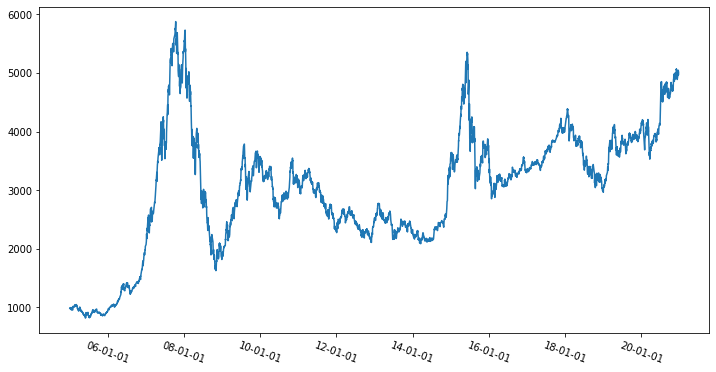

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(12,6))
plt.plot(csi300['Date'],csi300['Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.xticks(rotation=-20)
plt.show()

In [50]:
csi = csi300[['Close','Open','High','Low','Volume','Change Pct']]

In [51]:
# from sklearn.model_selection import train_test_split
# divide CSI300 index dataset
train = csi[0:3100]
test = csi[3100:]

In [52]:
print(train.shape)
print(test.shape)
print(len(train))
print(type(test))

(3100, 6)
(786, 6)
3100
<class 'pandas.core.frame.DataFrame'>


In [53]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = MinMaxScaler()
train_norm = scaler.fit_transform(train)
test_norm = scaler.fit_transform(test)

In [54]:
train_norm

array([[0.03256661, 0.03532025, 0.03372429, 0.03452194, 0.00350738,
        0.40473628],
       [0.03449775, 0.03270621, 0.03422746, 0.03436618, 0.0030818 ,
        0.55059203],
       [0.03264172, 0.03503487, 0.03353092, 0.03445604, 0.00186376,
        0.44617869],
       ...,
       [0.5929352 , 0.59706134, 0.59424096, 0.59972882, 0.14518212,
        0.46932185],
       [0.59352621, 0.59331765, 0.59153765, 0.59918168, 0.1127792 ,
        0.50161464],
       [0.59360923, 0.59502797, 0.59368451, 0.60126442, 0.11834111,
        0.49784715]])

In [55]:
# divide data into 30/50 rows per input
timestamp = 30

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(timestamp, len(train)):
    X_train.append(train_norm[i - timestamp:i])
    y_train.append(train_norm[i,0])
    
for i in range(timestamp, len(test)):
    X_test.append(test_norm[i - timestamp:i])
    y_test.append(test_norm[i,0])

import numpy as np
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(3070, 30, 6)
(756, 30, 6)
(3070,)


In [56]:
y_test.shape

(756,)

In [65]:
# data prediction
from keras import Input
from keras.models import Sequential, Model
from keras.layers import SimpleRNN, LSTM, Dense, Dropout, Activation, Reshape   

epochs = 15

# iteration number of batches
batch_size = 20

input_dim = X_train.shape[-1]
output_dim = 1
units = 30
timesteps = 30

In [66]:
X_train_r = X_train.reshape((-1,timesteps,input_dim,1))

In [158]:
from keras.layers import Conv1D, Conv2D, Flatten, concatenate, MaxPooling1D, MaxPooling2D, Bidirectional, MaxPooling2D, TimeDistributed
# Combined Model: CNN + LSTM

import time
'''combined model'''
combined_start = time.time()
combined_model = Sequential()

'''cnn'''
combined_model.add(TimeDistributed(Conv1D(filters = 20, kernel_size = (2,), activation = 'relu'),input_shape=(timesteps,input_dim, 1)))
combined_model.add(TimeDistributed(Flatten()))
combined_model.add(Dense(32, activation='relu'))

'''lstm'''
combined_model.add(LSTM(units, activation='relu'))
combined_model.add(Dense(output_dim))
combined_model.compile(optimizer='adam', loss='mean_squared_error')

In [159]:
combined_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_23 (TimeDis (None, 30, 5, 20)         60        
_________________________________________________________________
time_distributed_24 (TimeDis (None, 30, 100)           0         
_________________________________________________________________
dense_36 (Dense)             (None, 30, 32)            3232      
_________________________________________________________________
lstm_19 (LSTM)               (None, 30)                7560      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 31        
Total params: 10,883
Trainable params: 10,883
Non-trainable params: 0
_________________________________________________________________


In [ ]:
combined_model.fit(X_train_r, y_train, epochs=epochs, batch_size=batch_size)

combined_end = time.time()
combined_time = combined_end - combined_start
print('\n'+str(combined_time)+'s')

Epoch 1/15
3070/3070 [==============================] - 3s 1ms/step - loss: 0.0133
Epoch 2/15
3070/3070 [==============================] - 2s 661us/step - loss: 2.8247e-04
Epoch 3/15
3070/3070 [==============================] - 2s 662us/step - loss: 2.2909e-04
Epoch 4/15
3070/3070 [==============================] - 2s 661us/step - loss: 1.9446e-04
Epoch 5/15
3070/3070 [==============================] - 2s 646us/step - loss: 1.8521e-04
Epoch 6/15
3070/3070 [==============================] - 2s 646us/step - loss: 1.7235e-04
Epoch 7/15
3070/3070 [==============================] - 2s 648us/step - loss: 1.6621e-04
Epoch 8/15
3070/3070 [==============================] - 2s 647us/step - loss: 1.6088e-04
Epoch 9/15
1540/3070 [==============>...............] - ETA: 0s - loss: 1.7200e-04

In [ ]:
X_test_r = X_test.reshape((-1,timesteps,input_dim,1))

combined_predict = combined_model.predict(X_test_r)

scaler.fit_transform(pd.DataFrame(test['Close'].values))

# denormalization

combined_predict = scaler.inverse_transform(combined_predict)
y_test = scaler.inverse_transform([y_test])

In [148]:
'''RNN'''
rnn_start = time.time()

input_layer = Input(shape=(timesteps, input_dim))
rnn_output = SimpleRNN(units, activation='relu')(input_layer)
output_layer = Dense(output_dim)(rnn_output)
rnn_model = Model(inputs=input_layer, outputs=output_layer)
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

rnn_end = time.time()
rnn_time = rnn_end - rnn_start
print('\n'+str(rnn_time)+'s')

Epoch 1/15
3070/3070 [==============================] - 1s 472us/step - loss: 0.0048
Epoch 2/15
3070/3070 [==============================] - 0s 146us/step - loss: 8.8403e-04
Epoch 3/15
3070/3070 [==============================] - 0s 146us/step - loss: 5.3228e-04
Epoch 4/15
3070/3070 [==============================] - 0s 146us/step - loss: 3.6008e-04
Epoch 5/15
3070/3070 [==============================] - 0s 146us/step - loss: 2.7968e-04
Epoch 6/15
3070/3070 [==============================] - 0s 146us/step - loss: 2.2232e-04
Epoch 7/15
3070/3070 [==============================] - 0s 146us/step - loss: 2.3003e-04
Epoch 8/15
3070/3070 [==============================] - 0s 146us/step - loss: 1.9856e-04
Epoch 9/15
3070/3070 [==============================] - 0s 147us/step - loss: 1.9633e-04
Epoch 10/15
3070/3070 [==============================] - 0s 145us/step - loss: 2.0319e-04
Epoch 11/15
3070/3070 [==============================] - 0s 146us/step - loss: 1.7347e-04
Epoch 12/15
3070/3070 [

In [149]:
rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 30, 6)             0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 30)                1110      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 31        
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [150]:
rnn_predict = rnn_model.predict(X_test)
# scaler.fit_transform(pd.DataFrame(test['Close'].values))

# denormalization
rnn_predict = scaler.inverse_transform(rnn_predict)

In [129]:
import time

In [145]:
'''LSTM'''
lstm_start = time.time()
input_layer = Input(shape=(timesteps, input_dim))
lstm_output = LSTM(units, activation='relu')(input_layer)
output_layer = Dense(output_dim)(lstm_output)
lstm_model = Model(inputs=input_layer,outputs=output_layer)
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

lstm_end = time.time()
lstm_time = lstm_end - lstm_start
print('\n'+str(lstm_time)+'s')

Epoch 1/15
3070/3070 [==============================] - 3s 952us/step - loss: 0.0065
Epoch 2/15
3070/3070 [==============================] - 2s 584us/step - loss: 2.9681e-04
Epoch 3/15
3070/3070 [==============================] - 2s 583us/step - loss: 2.3795e-04
Epoch 4/15
3070/3070 [==============================] - 2s 585us/step - loss: 2.2183e-04
Epoch 5/15
3070/3070 [==============================] - 2s 584us/step - loss: 1.8889e-04
Epoch 6/15
3070/3070 [==============================] - 2s 581us/step - loss: 1.8202e-04
Epoch 7/15
3070/3070 [==============================] - 2s 605us/step - loss: 1.8048e-04
Epoch 8/15
3070/3070 [==============================] - 2s 684us/step - loss: 1.6104e-04
Epoch 9/15
3070/3070 [==============================] - 2s 773us/step - loss: 1.6195e-04
Epoch 10/15
3070/3070 [==============================] - 2s 775us/step - loss: 1.5545e-04
Epoch 11/15
3070/3070 [==============================] - 2s 749us/step - loss: 1.7336e-04
Epoch 12/15
3070/3070 [

In [146]:
lstm_predict = lstm_model.predict(X_test)
# scaler.fit_transform(pd.DataFrame(test['Close'].values))

# denormalization
lstm_predict = scaler.inverse_transform(lstm_predict)

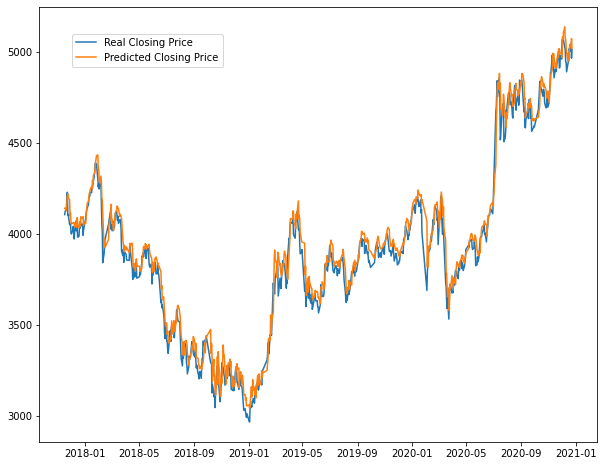

In [151]:
plt.figure(figsize=(10,8))
rnn_plot = {
    
    # transform the data shape into (736,1)
    'Predictions': rnn_predict.reshape(1,-1)[0],
    'Close': y_test[0]
}

rnn_pd = pd.DataFrame(rnn_plot)

x = csi300['Date'][3130:]
plt.plot(x, rnn_pd['Close'], label="Real Closing Price")
plt.plot(x, rnn_pd['Predictions'], label="Predicted Closing Price")
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))

plt.savefig('csi_rnn30.png', transparent=True, dpi=100)

# plt.plot(data_pd[['Close', 'Predictions']])
plt.show()

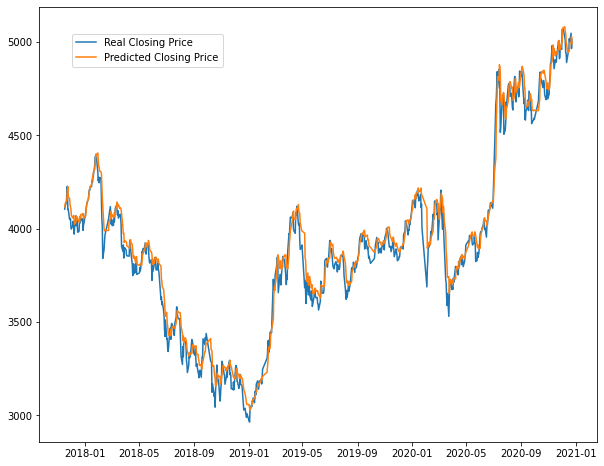

In [133]:
plt.figure(figsize=(10,8))
lstm_plot = {
    
    # transform the data shape into (736,1)
    'Predictions': lstm_predict.reshape(1,-1)[0],
    'Close': y_test[0]
}

lstm_pd = pd.DataFrame(lstm_plot)

x = csi300['Date'][3130:]
plt.plot(x, lstm_pd['Close'], label="Real Closing Price")
plt.plot(x, lstm_pd['Predictions'], label="Predicted Closing Price")
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))

plt.savefig('csi_lstm30.png', transparent=True, dpi=100)
plt.show()

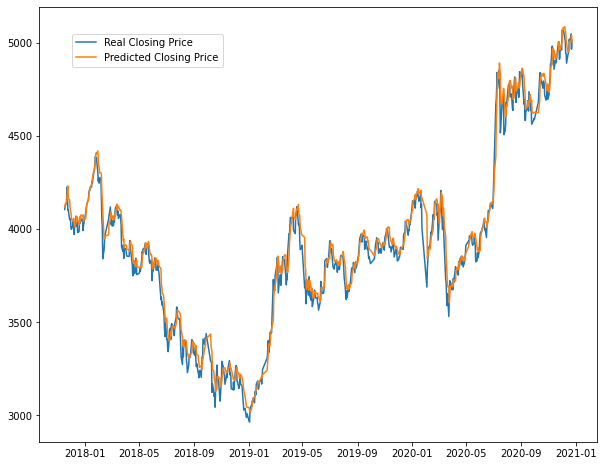

In [134]:
plt.figure(figsize=(10,8))
combined_plot = {
    
    # transform the data shape into (736,1)
    'Predictions': combined_predict.reshape(1,-1)[0],
    'Close': y_test[0]
}

combined_pd = pd.DataFrame(combined_plot)

x = csi300['Date'][3130:]
plt.plot(x, combined_pd['Close'], label="Real Closing Price")
plt.plot(x, combined_pd['Predictions'], label="Predicted Closing Price")
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))

plt.savefig('csi_combined30.png', transparent=True, dpi=100)
plt.show()

In [157]:
'''Evaluation'''
# MSE：
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_absolute_percentage_error


rnn_rmse = np.sqrt(mean_squared_error(y_test[0], rnn_predict[:,0]))
lstm_rmse = np.sqrt(mean_squared_error(y_test[0], lstm_predict[:,0]))
combined_rmse = np.sqrt(mean_squared_error(y_test[0], combined_predict[:,0]))

rnn_mae = mean_absolute_error(y_test[0], rnn_predict[:,0])
lstm_mae = mean_absolute_error(y_test[0], lstm_predict[:,0])
combined_mae = mean_absolute_error(y_test[0], combined_predict[:,0])

def mape(y_pred, y_true):
    return np.mean(np.abs((y_pred - y_true) / y_true)) 


rnn_mape = mape(rnn_predict[:,0], y_test[0])
lstm_mape = mape(lstm_predict[:,0], y_test[0])
combined_mape = mape(combined_predict[:,0], y_test[0])

pd.DataFrame.from_records([[rnn_mae, "{:.2%}".format(rnn_mape), rnn_rmse], [lstm_mae, "{:.2%}".format(lstm_mape), lstm_rmse],
                           [combined_mae, "{:.2%}".format(combined_mape), combined_rmse]], 
                          columns=['MAE', 'MAPE', 'RMSE'], 
                          index=['RNN model', 'LSTM model', 'CNN+LSTM model'])


,MAE,MAPE,RMSE
RNN model,55.210513,1.45%,71.960499
LSTM model,46.941965,1.23%,64.763278
CNN+LSTM model,49.283282,1.29%,66.641239
